#AI_CA2

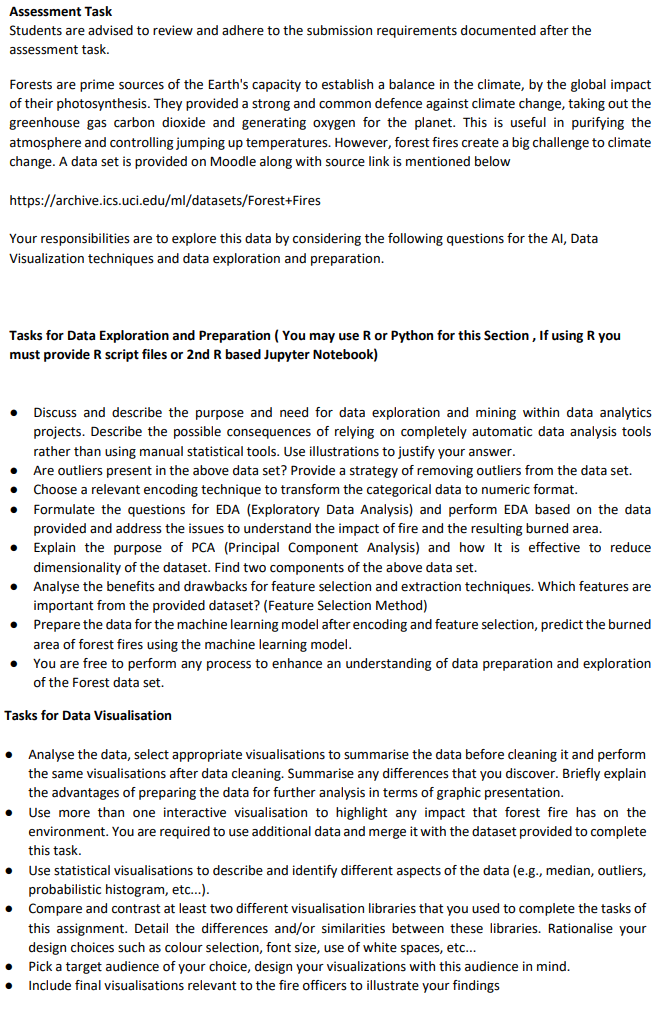

**Answer:**
## Purpose and Need for Data exploration:
Exploration is a method of learning about data before working with it, and it is one of the first steps in the data preparation process. Through survey and investigation, large datasets are produced for more in-depth, systematic evaluation. EDA is comparable to exploratory data analysis, except it includes statistical graphics and other data visualisation approaches.
Data exploration helps you develop a better grasp of a dataset, making it easier to explore and use it later. If an analyst is familiar with the data they are working with, their analysis will be more accurate. Exploration that is successful starts with an open mind, discovers new routes for discovery, and aids in the identification and refinement of future analytics questions and challenges.

## Purpose and Need of Data Mining:
Data mining is the method of analyzing big data in exploring business intelligence that can assist firms in solving problems, reducing risks, and seizing new possibilities. The similarities between looking for important information in a vast database and mining for minerals on a mountain inspired the name of this discipline of data science. Both approaches need combing through massive amounts of data in order to uncover hidden value.
Data mining can provide answers to business questions that were previously too time consuming to answer manually. Users can find patterns, trends, and relationships that they might otherwise overlook by employing a variety of statistical tools to examine data in various ways. They can use the information to forecast what will happen in the future and take action to impact business outcomes.

## Consequences of relyinf on Automatic Data Analysis tools

Automation Data Analysis tools can speed up the analytics process. When an analysis requires little or no human input, a data scientist can do analytics more rapidly, and computers can efficiently execute jobs that are complex and time-consuming for humans.
The use of automation technologies is essential for properly evaluating large amounts of data.
Automated data analytics saves time and money for businesses. When it comes to data analysis, employee time is more expensive than computing resources, and machines can execute analytics quickly.
Data scientists can focus on generating fresh insights to support data-driven decision-making by automating tasks that don't require a lot of human originality or imagination.
As shown in figure below Automated analytics systems can provide recommendations based on a final statistical model, saving the scientist or business stakeholders the time and effort of rerunning a study numerous times to analyse various sets of manually selected and modified data.

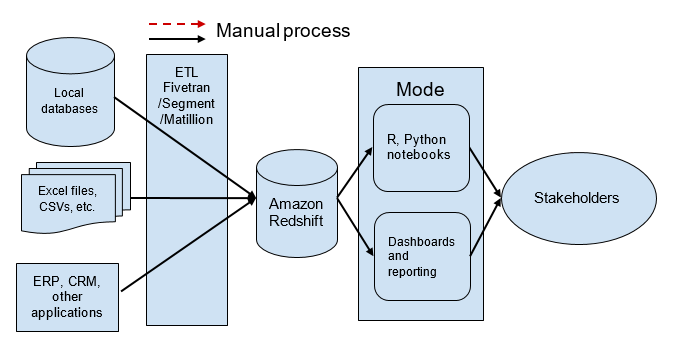

**Answer:**
## Purpose of Principal Component Analysis:
The purpose of Principal Component Analysis, or PCA, is to reduce the dimensionality-reduction of large data sets by transforming a large collection of variables into a smaller one that retains the majority of the information in the large set.Naturally, reducing the number of variables in a data set reduces accuracy; nevertheless, the answer to dimensionality reduction is to exchange some accuracy for simplicity. Because smaller data sets are easier to study and display, and because machine learning algorithms can analyse data more easily and quickly without having to deal with superfluous factors. PCA's goal is to reduce the number of variables in a data collection while retaining as much information as possible.

#Load Dataset directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading libraries

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import random

# importing sklearn libraries
from sklearn import neural_network, linear_model, preprocessing, svm, tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from scipy.stats import norm
import seaborn as sns
from scipy import stats
from scipy.stats import norm
# importing keras libraries
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasRegressor

import warnings

# supressing the warning on the usage of Linear Regression model
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## Working with the dataset

### Loading the dataset

The dataset can be downloaded from: https://www.kaggle.com/elikplim/forest-fires-data-set

The attributes in the dataset include:
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec"
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

In [ ]:
forest_fires = pd.read_csv('/content/drive/MyDrive/forestfiredataset/forestfires.csv')
forest_fires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### Converting the labels under month and day to integers

In [ ]:
forest_fires.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
forest_fires.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

### Statistical analysis of dataset

In [ ]:
forest_fires.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


**Summary Statistics**

In [ ]:
forest_fires.describe(include='all') #its shows basic statistical characteristics of each numerical feature.
# include all ,consider categorical columns also.

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
forest_fires.head(6)# gives top  6 rows of dataset.

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0


In [ ]:
forest_fires.tail(6)      #gives last 6 rows of dataset.

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
511,8,6,8,7,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,11,2,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [ ]:
forest_fires.info()    # gives general information about dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc295cce410>,
      dtype=object)

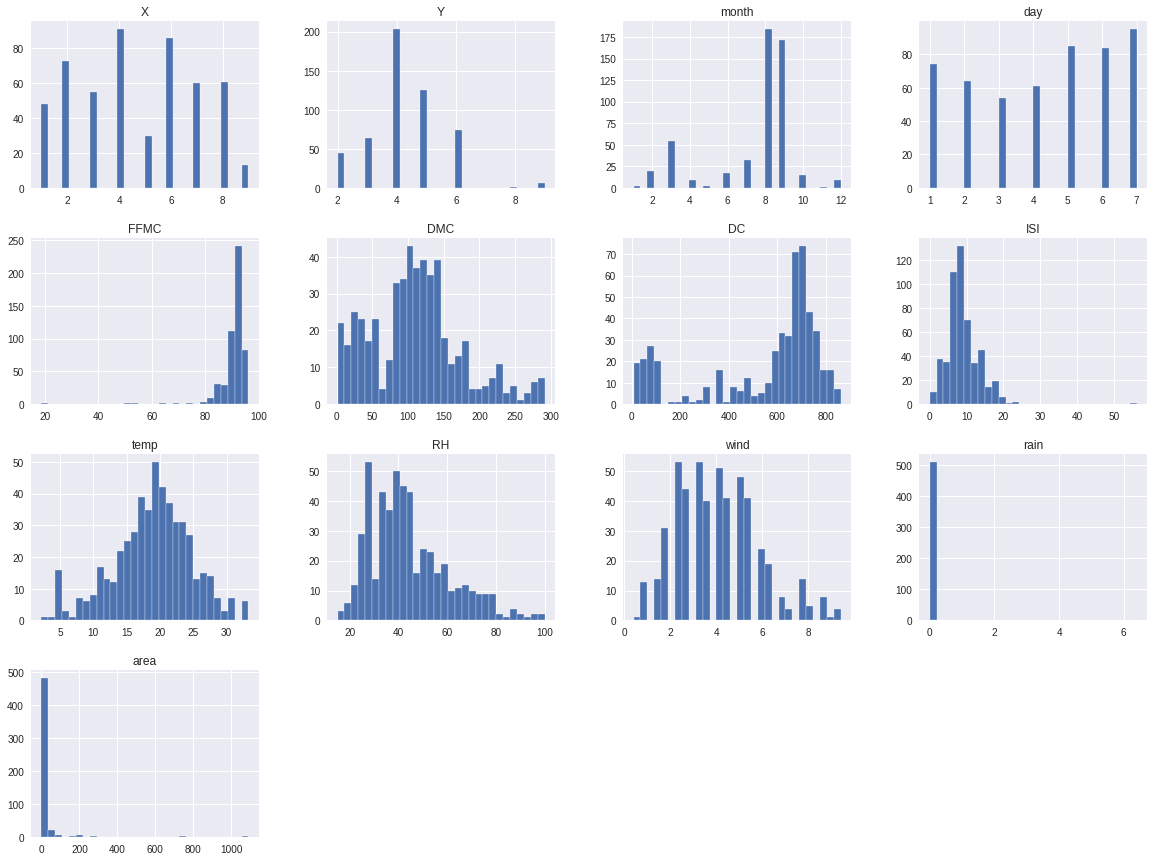

In [ ]:
# Libraries and configurations for figure plotting
plt.style.use('seaborn')
forest_fires.hist(bins=30, figsize=(20,15)) # plotting the histogram

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

 mu = 12.85 and sigma = 63.59



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


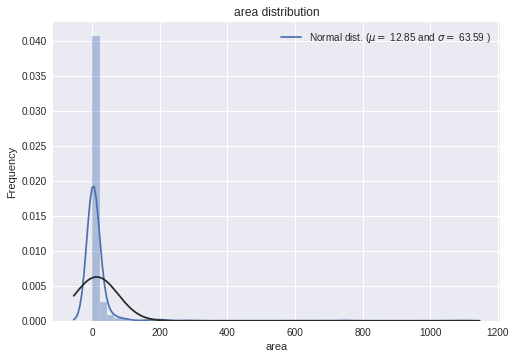

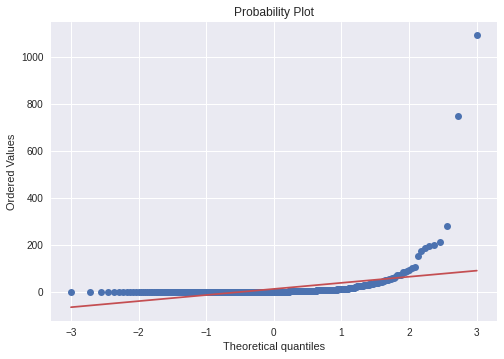

Skewness: 12.846934
Kurtosis: 194.140721


In [ ]:
forest_fires_des=forest_fires['area'].describe()
print(forest_fires_des)
# Plot Histogram
sns.distplot(forest_fires['area'], fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(forest_fires['area'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
   loc='best')
plt.ylabel('Frequency')
plt.title('area distribution')

fig = plt.figure()
res = stats.probplot(forest_fires['area'], plot=plt)
plt.show()

print("Skewness: %f" % forest_fires['area'].skew())
print("Kurtosis: %f" % forest_fires['area'].kurt())

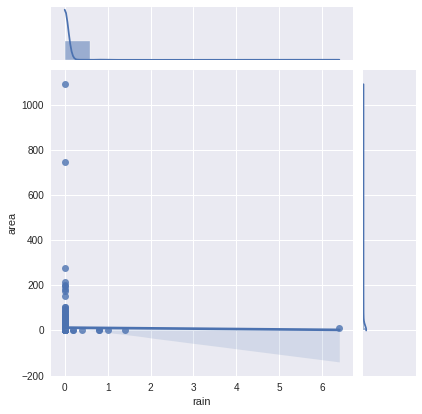

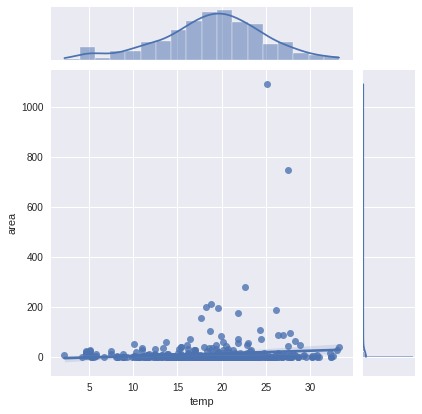

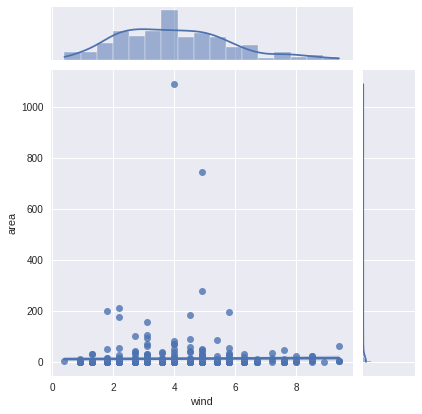

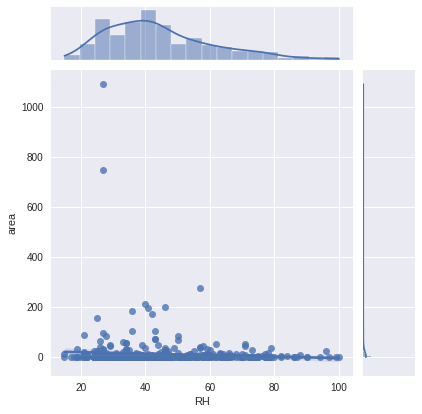

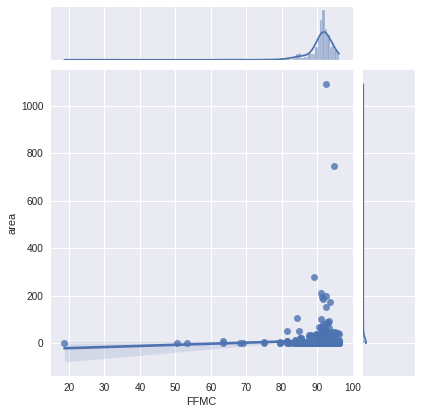

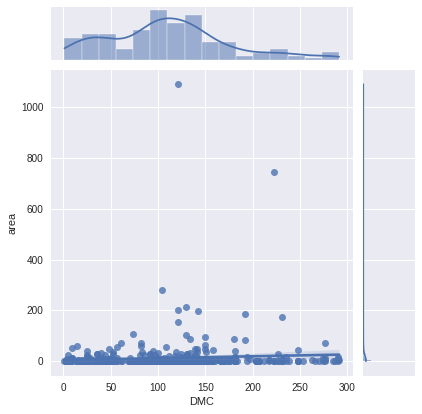

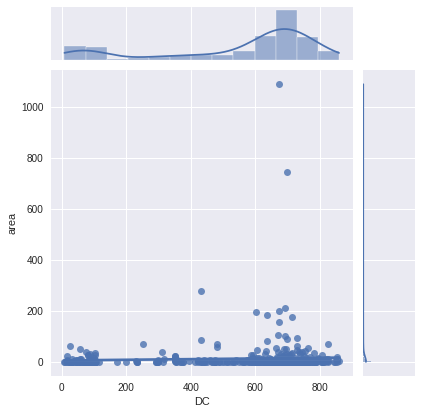

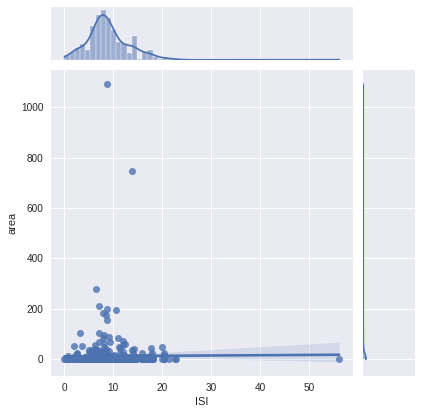

In [ ]:
data=forest_fires

sns.jointplot(x=data["rain"], y=data["area"], kind='reg')
plt.show()

sns.jointplot(x=data["temp"], y=data["area"], kind='reg')
plt.show()

sns.jointplot(x=data["wind"], y=data["area"], kind='reg')
plt.show()

sns.jointplot(x=data["RH"], y=data["area"], kind='reg')
plt.show()

sns.jointplot(x=data["FFMC"], y=data["area"], kind='reg')
plt.show()

sns.jointplot(x=data["DMC"], y=data["area"], kind='reg')
plt.show()

sns.jointplot(x=data["DC"], y=data["area"], kind='reg')
plt.show()

sns.jointplot(x=data["ISI"], y=data["area"], kind='reg')
plt.show()

In [ ]:
# Removing outliers manually (More than 4-cars, less than $300k)
print("Highest allowed",forest_fires['area'].mean() + 3*forest_fires['area'].std())
print("Lowest allowed",forest_fires['area'].mean() - 3*forest_fires['area'].std())

Highest allowed 203.8147474734548
Lowest allowed -178.1201633341898


count    517.000000
mean       9.920269
std       28.588138
min        0.000000
25%        0.000000
50%        0.520000
75%        6.570000
max      203.814747
Name: area, dtype: float64

 mu = 9.92 and sigma = 28.56



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


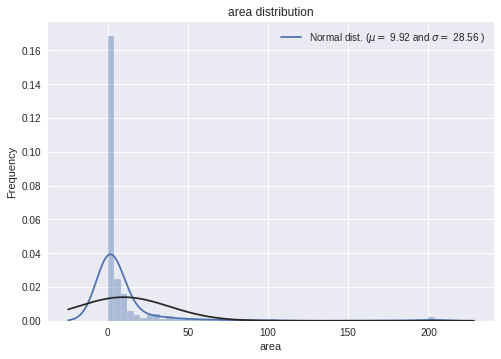

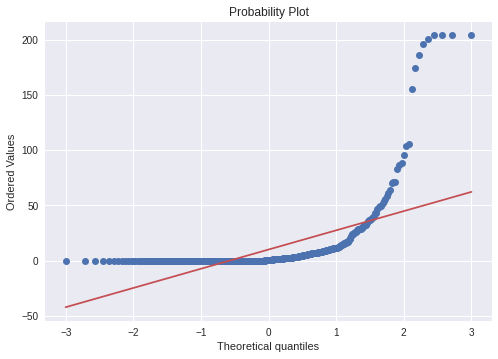

Skewness: 5.066062
Kurtosis: 28.503755


In [ ]:
# Removing outliers manually (More than 4-cars, less than $300k)
high=203.8
low=-178.1
# Finding the Outliers

forest_fires[(forest_fires['area'] >high) | (forest_fires['area'] < low)]
# Trimming of Outliers

new_forest_fires = forest_fires[(forest_fires['area'] < high) & (forest_fires['area'] > low)]
new_forest_fires
# Capping on Outliers

upper_limit = forest_fires['area'].mean() + 3*forest_fires['area'].std()
lower_limit = forest_fires['area'].mean() - 3*forest_fires['area'].std()
#Now, apply the Capping

forest_fires['area'] = np.where(
    forest_fires['area']>upper_limit,
    upper_limit,
    np.where(
        forest_fires['area']<lower_limit,
        lower_limit,
        forest_fires['area']
    )
)
#Now see the statistics using “Describe” Function
forest_fires_des=forest_fires['area'].describe()
print(forest_fires_des)
# Plot Histogram
sns.distplot(forest_fires['area'], fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(forest_fires['area'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
   loc='best')
plt.ylabel('Frequency')
plt.title('area distribution')

fig = plt.figure()
res = stats.probplot(forest_fires['area'], plot=plt)
plt.show()

print("Skewness: %f" % forest_fires['area'].skew())
print("Kurtosis: %f" % forest_fires['area'].kurt())

**Data Analysis :- FWI Code Realation with Temporal Conditions**

In [ ]:
df1=pd.pivot_table(data=forest_fires,values=['rain','temp','wind','RH','area','FFMC','DMC','DC','ISI'],index='month',aggfunc=['mean'])
df1

mean                         ...                               
               DC         DMC       FFMC  ...      rain       temp      wind
month                                     ...                               
1       90.350000    2.400000  50.400000  ...  0.000000   5.250000  2.000000
2       54.670000    9.475000  82.905000  ...  0.000000   9.635000  3.755000
3       75.942593   34.542593  89.444444  ...  0.003704  13.083333  4.968519
4       48.555556   15.911111  85.788889  ...  0.000000  12.044444  4.666667
5       93.750000   26.700000  87.350000  ...  0.000000  14.650000  4.450000
6      297.705882   93.382353  89.429412  ...  0.000000  20.494118  4.135294
7      450.603125  110.387500  91.328125  ...  0.006250  22.109375  3.734375
8      641.077717  153.732609  92.336957  ...  0.058696  21.631522  4.086413
9      734.615698  120.922674  91.243023  ...  0.000000  19.612209  3.557558
10     681.673333   41.420000  90.453333  ...  0.000000  17.093333  3.460000
11     106.700000    3.000000  79.500000  ...  0.000000  11.800000  4.500000
12     351.244444   26.122222  84.966667  ...  0.000000   4.522222  7.644444

[12 rows x 9 columns]

In [ ]:
df1[('mean','rain')].sort_values(ascending=False).head(4)

month
8     0.058696
7     0.006250
3     0.003704
12    0.000000
Name: (mean, rain), dtype: float64

In [ ]:
df1[('mean','temp')].sort_values(ascending=False).head(4)

month
7    22.109375
8    21.631522
6    20.494118
9    19.612209
Name: (mean, temp), dtype: float64

In [ ]:
df1[('mean','wind')].sort_values(ascending=True).head(4)

month
1     2.000000
10    3.460000
9     3.557558
7     3.734375
Name: (mean, wind), dtype: float64

In [ ]:
df1[('mean','RH')].sort_values(ascending=True).head(4)

month
11    31.000000
10    37.466667
12    38.444444
3     40.000000
Name: (mean, RH), dtype: float64

In [ ]:
df1[('mean','DC')].sort_values(ascending=False).head(4)

month
9     734.615698
10    681.673333
8     641.077717
7     450.603125
Name: (mean, DC), dtype: float64

In [ ]:
df1[('mean','DMC')].sort_values(ascending=False).head(4)

month
8    153.732609
9    120.922674
7    110.387500
6     93.382353
Name: (mean, DMC), dtype: float64

In [ ]:
df1[('mean','FFMC')].sort_values(ascending=False).head(4)

month
8     92.336957
7     91.328125
9     91.243023
10    90.453333
Name: (mean, FFMC), dtype: float64

In [ ]:
df1[('mean','ISI')].sort_values(ascending=False).head(4)

month
6    11.776471
8    11.072283
7     9.393750
9     8.577326
Name: (mean, ISI), dtype: float64

Weather Observations:
1. Rain
Rainfall only in these months:aug,july and mar which is even very less in amount.

Months receving no rainfall is more of a dangerous conditions with respect to rainfall prospective.

2. Temp
june,july,aug,sep,oct has high temp

3. Wind
wind is low in jan,feb,july,sep,oct

2. Relative Humidity
we see humidity is also low in sep oct nov dec

1. DC value high in july,aug,sep,oct more dry in that month
2. DMC value high in july ,aug,sep but not in oct
3. FFMC value high above 90 in aug,july,sep,oct 
4. ISI value high in june july aug,sep 
Forest Fire Prediction
1. Month having no rainfall is more prone to catch forest fire. 
2. When temp is increasing the moisture content of all 3 different types of fuel is reduced in the same month, so more dangerous conditions have occured in the months of july,aug,sep,oct from temp prospective 
3. Also we can see that DMC and DC value have no significant relations with wind and Relative humidity columns 
4. Months having low humidity is more prone to catch forest fire.

**Data Visualization**

Skew: 5.066062240638397
Kurtosis: 28.503755233055028


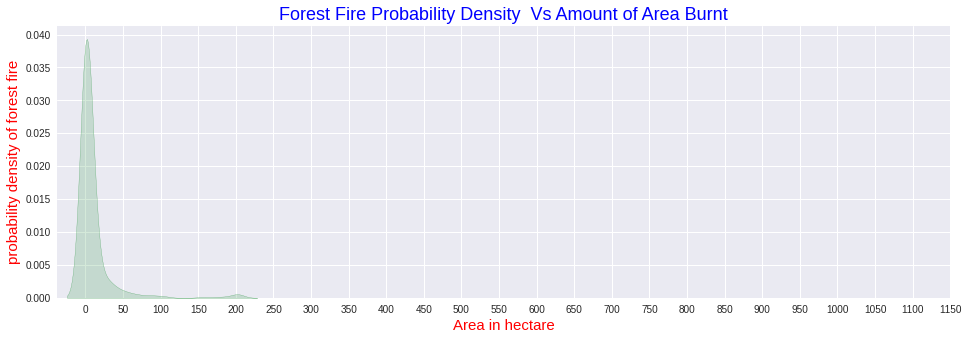

In [ ]:
# analysis on burned area
plt.figure(figsize=(16,5))
print("Skew: {}".format(forest_fires['area'].skew()))
print("Kurtosis: {}".format(forest_fires['area'].kurtosis()))
ax = sns.kdeplot(forest_fires['area'],shade=True,color='g')
plt.xlabel('Area in hectare',color='red',fontsize=15)
plt.ylabel('probability density of forest fire',color='red',fontsize=15)
plt.title('Forest Fire Probability Density  Vs Amount of Area Burnt',color='blue',fontsize=18)
plt.xticks([i for i in range(0,1200,50)])
plt.show()

Observations:
1. The burned area is highly skewed with a value of +12.84 ha and huge kurtosis value of 194 ha.
2. It even tells you that majority of the forest fires do not cover a large area, most of the damaged area is under 50 hectares of land.

In [ ]:
dfa = forest_fires.drop(columns='area')
cat_columns = dfa.select_dtypes(include='object').columns.tolist()  #seperating categorical columns from data set
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()  #seperating numerical columns from data set

**Analyzing Categorical Columns**

In [ ]:
# Analysis of forest fire based on different months and days.
plt.figure(figsize=(16,10))
for i,col in enumerate(cat_columns,1):
    plt.subplot(2,2,i)     #indexing subplot using loop
    sns.countplot(data=dfa,y=col)  #countplot:count of each month/day in month/day columns
    plt.subplot(2,2,i+2)
    forest_fires[col].value_counts().plot.bar() #freq of each month/day in month/day columns
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.show()

<Figure size 1152x720 with 0 Axes>

Observations:

1.It is interesting to see that abnormally high number of the forest fires occur in the month of August and September amd least in Nov.

2.In the case of day, the days Friday - Monday have higher proportion of cases. (However, no strong indicators)

In [ ]:
# Analysis of forest fire damage based on different months and days.
# Adding categorical variable  based on forest fire area as No damage, low, moderate, high, very high
def area_cat(area):    # grouping damage category based on amount of area burned.
  if area == 0.0:
    return "No damage"
  elif area <= 1:
    return "low"
  elif area <= 25:
    return "moderate"
  elif area <= 100:
   return "high"
  else:
   return "very high"

forest_fires['damage_category'] = forest_fires['area'].apply(area_cat)




for col in cat_columns:      
    cross = pd.crosstab(index=forest_fires['damage_category'],columns=forest_fires[col],normalize='index')
    cross.plot.barh(stacked=True,rot=40,cmap='plasma')
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.title("Forestfire damage each {}".format(col))
plt.show()

Observations:

1.Previously we had observed that August and September had the most number of forest fires. And from the above plot of month, we can understand few things

#Most of the fires in August were low (< 1 hectare).

#The very high damages(>100 hectares) happened in only 3 months - august,july and september.

2.Regarding fire damage per day, nothing much can be observed. Except that, there were no very high damaging fires on Friday.
#on Saturdays it has been reported most

**Analyzing Numerical Columns**

Text(0.5, 1.0, 'Burnt area in different regions of the park')

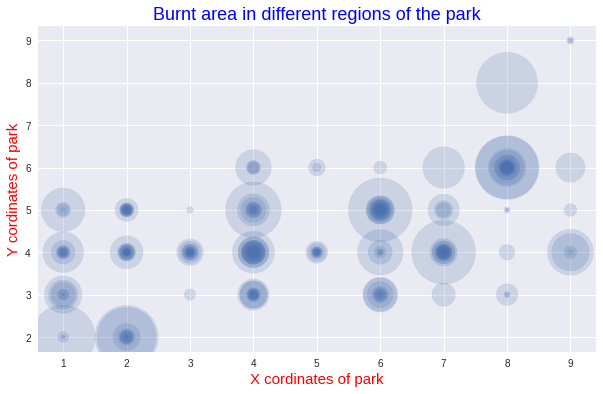

In [ ]:
# Analysis of Burnt area based on spatial cordinates(X,Y)
forest_fires.plot(kind='scatter', x='X', y='Y', alpha=0.2, s=20*forest_fires['area'],figsize=(10,6))
plt.xlabel('X cordinates of park',color='red',fontsize=15)
plt.ylabel('Y cordinates of park',color='red',fontsize=15)
plt.title('Burnt area in different regions of the park',color='blue',fontsize=18)

Observations:

1. from the above scatter plot of 9X9 representation of park we can see that there are multiple hotspots for burnt area.

2. The cordinates (6,5) show intense burnt area.

3. By applying maximum and minimum function on area columns.

#. we can deduce the min burned area is at (1,2) cordinates whereas

#. max burned area is at (9,9) cordinates

In [ ]:
# monthly analysis of burnt area, where the condition is: area>0
areaburnt=forest_fires[forest_fires['area']>0]
areaburnt

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category
138,9,9,7,2,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,low
139,1,4,9,2,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,low
140,2,5,9,1,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,low
141,1,2,8,3,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,low
142,8,6,8,5,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,4,8,5,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,moderate
510,6,5,8,5,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,low
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,moderate
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,high


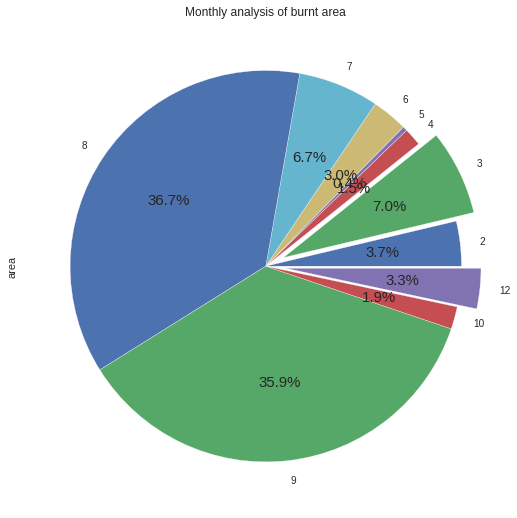

In [ ]:
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),explode=[0,0.1,0,0,0,0,0,0,0,0.1],autopct='%0.1f%%')
plt.show()

Observations:

1. As we can see from the above pie chart,the month of aug and sep have recorded highest % of forest fire i.e 36.8% & 36.1% respectively.

2. Month that recorded least forest fire is may with 0.4%. 

Conclusion:

1. From above analysis we can conclude that due to less rainfall the temp increses which affect all the FWI codes.

Also there is no significant changes in DMC and DC codes due to wind as they are depth layer of fuel codes.

2.Also majority of the forest fires do not cover a large area most of the damaged area is under 50 hectares of land 

3. high number of the forest fires occur in the month of August and September.

4. The cordinates (6,5) show intense burned area.

### Corelation analysis for the dataset

In [ ]:
corrmat=forest_fires.corr()
corrmat

NameError: ignored

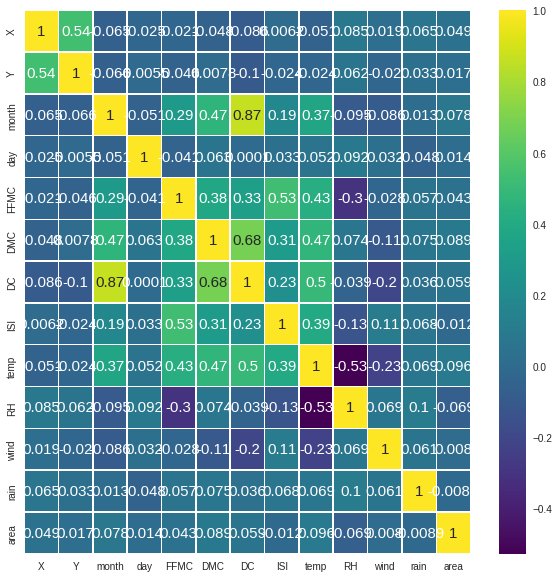

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(forest_fires.corr(),annot=True,cmap='viridis',linewidths=.5)

cols Index(['area', 'temp', 'DMC', 'month', 'DC', 'X', 'FFMC', 'Y', 'day', 'wind'], dtype='object')


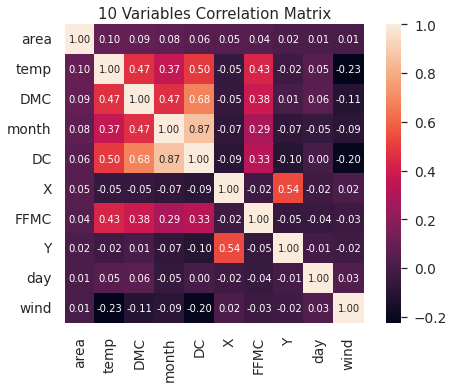

  Most Correlated Features
0                     area
1                     temp
2                      DMC
3                    month
4                       DC
5                        X
6                     FFMC
7                        Y
8                      day
9                     wind
Index(['area', 'temp', 'DMC', 'month', 'DC', 'X', 'FFMC', 'Y', 'day', 'wind'], dtype='object')


In [ ]:
# Top 10 Heatmap
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'area')['area'].index
print("cols", cols)
cm = np.corrcoef(forest_fires[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
 yticklabels=cols.values, xticklabels=cols.values)
plt.title('10 Variables Correlation Matrix')
plt.show()
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
print(most_corr)
corrs = most_corr.values
columnsname=list(cols)
print(cols)

In [ ]:
forest_fires1= forest_fires

forest_fires= forest_fires1[cols]
forest_fires.head()

,area,temp,DMC,month,DC,X,FFMC,Y,day,wind
0,0.0,8.2,26.2,3,94.3,7,86.2,5,5,6.7
1,0.0,18.0,35.4,10,669.1,7,90.6,4,2,0.9
2,0.0,14.6,43.7,10,686.9,7,90.6,4,6,1.3
3,0.0,8.3,33.3,3,77.5,8,91.7,6,5,4.0
4,0.0,11.4,51.3,3,102.2,8,89.3,6,7,1.8


### Extracting features from the dataset

In [ ]:
x_values = list(forest_fires['X'])
y_values = list(forest_fires['Y'])

loc_values = []

for index in range(0, len(x_values)):
    temp_value = []

    temp_value.append(x_values[index])
    temp_value.append(y_values[index])
    loc_values.append(temp_value)

In [ ]:
month_values = list(forest_fires['month'])
day_values = list(forest_fires['day'])

ffmc_values = list(forest_fires['FFMC'])
dmc_values = list(forest_fires['DMC'])
dc_values = list(forest_fires['DC'])
#isi_values = list(forest_fires['ISI'])

temp_values = list(forest_fires['temp'])
#rh_values = list(forest_fires['RH'])
wind_values = list(forest_fires['wind'])
#rain_values = list(forest_fires['rain'])

area_values = list(forest_fires['area'])

In [ ]:
attribute_list = []

for index in range(0, len(x_values)):
    temp_list = []
    
    temp_list.append(x_values[index])
    temp_list.append(y_values[index])
    
    temp_list.append(month_values[index])
    temp_list.append(day_values[index])

    temp_list.append(ffmc_values[index])
    temp_list.append(dmc_values[index])
    temp_list.append(dc_values[index])
    #temp_list.append(isi_values[index])

    temp_list.append(temp_values[index])
    #temp_list.append(rh_values[index])
    temp_list.append(wind_values[index])
    #temp_list.append(rain_values[index])
    
    attribute_list.append(temp_list)

### Counting the instances of location points in dataset

In [ ]:
def count_points(x_points, y_points, scaling_factor):
    count_array = []
    
    for index in range(0, len(x_points)):
        temp_value = [x_points[index], y_points[index]]
        count = 0
        
        for value in loc_values:
            if(temp_value == value):
                count = count + 1
        count_array.append(count * scaling_factor )

    return count_array

### Histogram plotting function for dataset

In [ ]:
def histogram_plot(dataset, title):
    plt.figure(figsize=(8, 6))    
    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.title(title, fontsize = 22)
    plt.hist(dataset, edgecolor='black', linewidth=1.8)

### Scatter plot for the locations

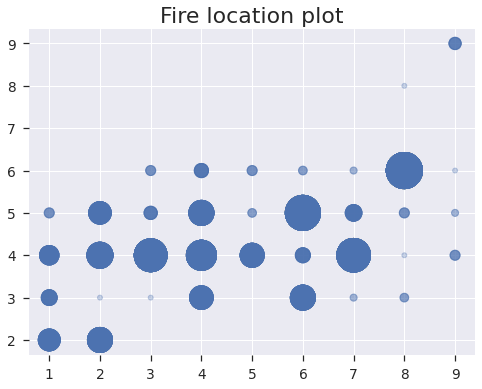

In [ ]:
plt.figure(figsize=(8, 6))    
    
ax = plt.subplot()    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
    
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left() 
    
plt.title("Fire location plot", fontsize = 22)
plt.scatter(x_values, y_values, s = count_points(x_values, y_values, 25), alpha = 0.3)
plt.show()

### Plotting the distribution of values for the dataset

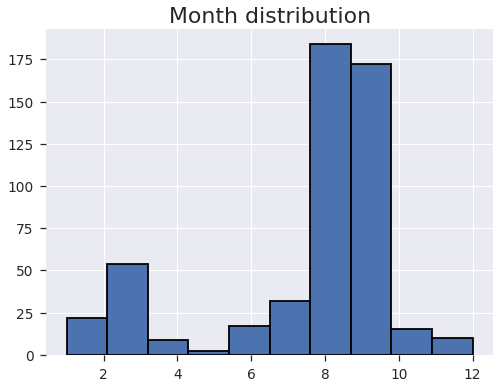

In [ ]:
histogram_plot(forest_fires['month'], title = "Month distribution")
plt.show()


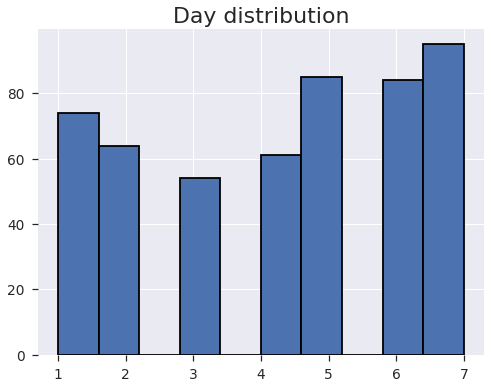

In [ ]:
histogram_plot(day_values, title = "Day distribution")
plt.show()

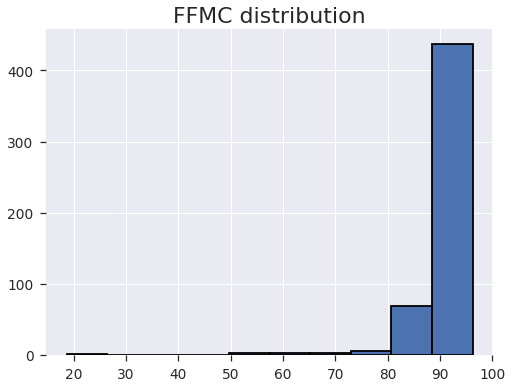

In [ ]:
histogram_plot(ffmc_values, title = "FFMC distribution")
plt.show()

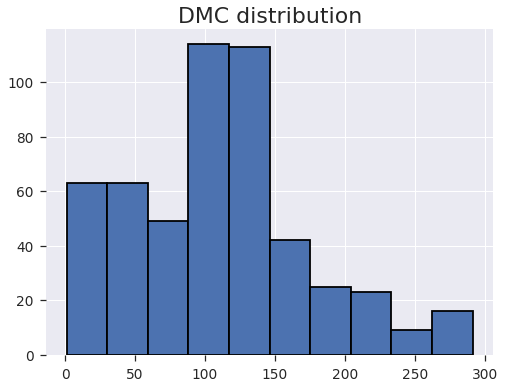

In [ ]:
histogram_plot(dmc_values, title = "DMC distribution")
plt.show()

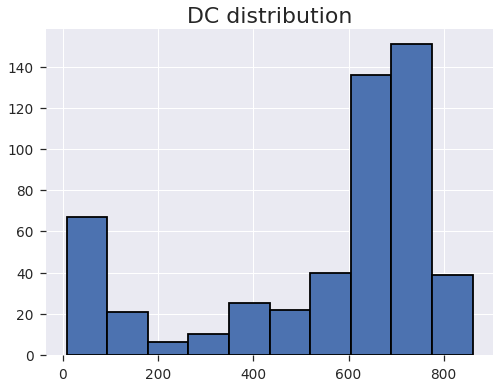

In [ ]:
histogram_plot(dc_values, title = "DC distribution")
plt.show()

In [ ]:
#histogram_plot(isi_values, title = "ISI distribution")
#plt.show()

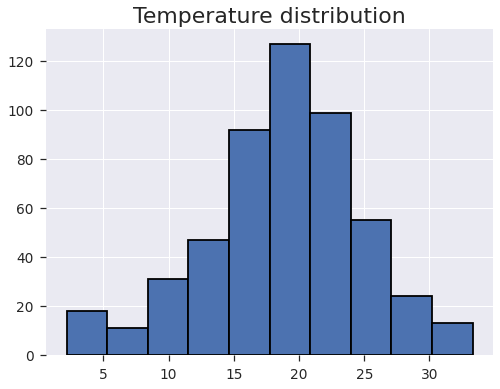

In [ ]:
histogram_plot(temp_values, title = "Temperature distribution")
plt.show()

In [ ]:
#histogram_plot(rh_values, title = "RH distribution")
#plt.show()

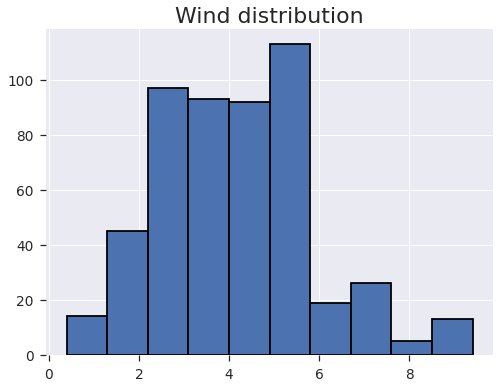

In [ ]:
histogram_plot(wind_values, title = "Wind distribution")
plt.show()

In [ ]:
#histogram_plot(rain_values, title = "Rain distribution")
#plt.show()

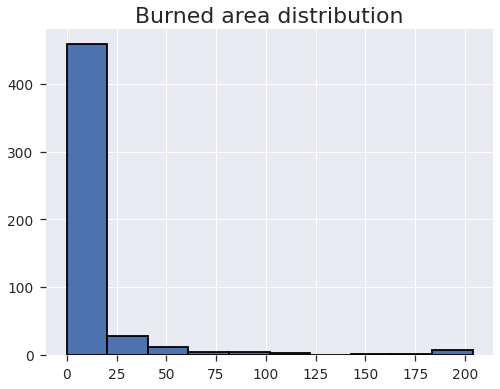

In [ ]:
histogram_plot(area_values, title = "Burned area distribution")
plt.show()

### Percentage of dataset with 'burned area' > 0

In [ ]:
total_count = 0
positive_data_count = 0

for value in area_values:
    if(value > 0):
      positive_data_count = positive_data_count + 1
    total_count = total_count + 1

print("The number of data records with 'burned area' > 0 are " + str(positive_data_count) + " and the total number of records are " + str(total_count) + ".")
print("The percentage value is " + str(positive_data_count/total_count * 100) + ".")

The number of data records with 'burned area' > 0 are 270 and the total number of records are 517.
The percentage value is 52.22437137330754.


## Gaining insights with learning models

### Spilliting the available data/Setting the initial parameters

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(attribute_list, area_values, test_size=0.3, random_state = 9)
mse_values = []
variance_score = []

### Printing the actual vs predicted values

In [ ]:
def print_values(test, predicted):
    print("The actual output and the predicted output are:")
    
    for value in range(0, len(predicted_y)):
      print('%.4f' % test_y[value], " ", '%.4f' % predicted_y[value])

### Linear regression model

In [ ]:
from sklearn.metrics import r2_score
from scipy import stats  # For in-built method to get PCC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from scipy.stats import norm

def results(target_y,predicted_y,modelname):
  y_valid= target_y
  preds= predicted_y
  model_name = modelname
  rms = np.sqrt(np.mean(np.power((np.array(y_valid) - np.array(preds)), 2)))
  print(model_name,":rms",rms)
  score= r2_score(y_valid, preds)
  print(model_name, ":score", score)
  mae= mean_absolute_error(y_valid, preds)
  print(model_name, ":mae", mae)
  mse= mean_squared_error(y_valid, preds)
  print(model_name, ":mse", mse)
  pearson_coef, p_value = stats.pearsonr(y_valid, preds)
  print(model_name, ":pearson_coef", pearson_coef)
  print(model_name, ":p_value ", p_value )
  # Plot Histogram

  sns.distplot(preds, fit=norm);
  # Get the fitted parameters used by the function
  (mu1, sigma1) = norm.fit(preds)
  print(model_name,'\n Predicted mu = {:.2f} and sigma = {:.2f}\n'.format(mu1, sigma1))
  plt.legend(['Predicted Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu1, sigma1)],
     loc='best')
  plt.ylabel('Frequency')
  plt.title('{m} Predicted SalePrice distribution'.format(m=model_name))
  # Plot Histogram
  sns.distplot(y_valid, fit=norm);
  sns.distplot(preds, fit=norm);
   # Get the fitted parameters used by the function
  (mu, sigma) = norm.fit(y_valid)
  (mu1, sigma1) = norm.fit(preds)
  print(model_name,'\n Valid mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
  print(model_name,'\n Predicted mu = {:.2f} and sigma = {:.2f}\n'.format(mu1, sigma1))
  plt.legend(['Valid Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
  plt.legend(['Predicted Normal dist. ($\mu1=$ {:.2f} and $\sigma1=$ {:.2f} )'.format(mu1, sigma1)], loc='best')
  plt.ylabel('Frequency')
  plt.title('{m} Valid vs Predicted SalePrice distribution'.format(m=model_name))

  fig = plt.figure()
  res = stats.probplot(y_valid, plot=plt)
  res = stats.probplot(preds, plot=plt)
  plt.title('{m} Valid vs Predicted Probability Plot'.format(m=model_name))
  plt.show()

Coefficients: 
 [ 0.13898611  0.94754951  0.99539261  0.3827746   0.01902899  0.01745068
 -0.0099081   0.41751104  0.5561103 ]

Mean squared error:  1624.333883707475
Variance score: -0.02
Linear Regression :rms 40.30302573886327
Linear Regression :score -0.02014742557797078
Linear Regression :mae 17.063075362314702
Linear Regression :mse 1624.333883707475
Linear Regression :pearson_coef 0.10038714941741925
Linear Regression :p_value  0.2124328845471611
Linear Regression 
 Predicted mu = 7.95 and sigma = 3.23

Linear Regression 
 Valid mu = 14.84 and sigma = 39.90

Linear Regression 
 Predicted mu = 7.95 and sigma = 3.23



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

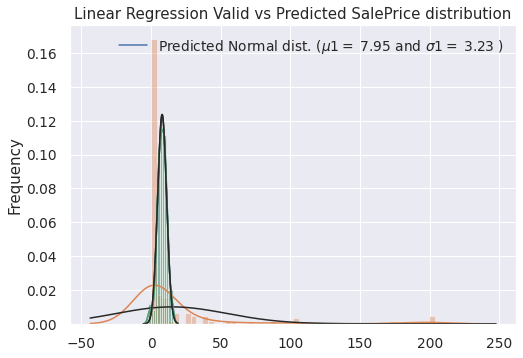

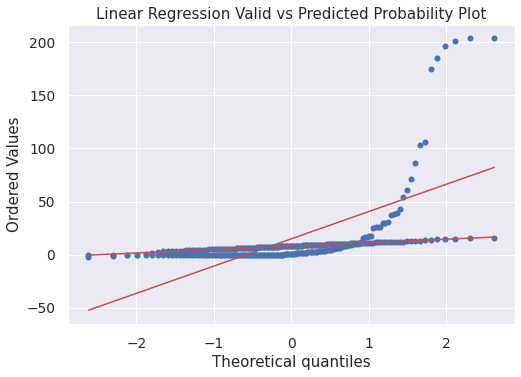

In [ ]:
linear_regression = linear_model.LinearRegression()

linear_regression.fit(train_x, train_y)
predicted_y = linear_regression.predict(test_x)

print('Coefficients: \n', linear_regression.coef_)

print("\nMean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)
results(test_y, predicted_y,"Linear Regression")

### SVM model

Mean squared error:  1794.3282071665424
Variance score: -0.13
SVM :rms 42.35951141321796
SVM :score -0.12691074140797354
SVM :mae 14.807599470904478
SVM :mse 1794.3282071665424
SVM :pearson_coef 0.013777157786577924
SVM :p_value  0.8644590217328845
SVM 
 Predicted mu = 0.61 and sigma = 0.32

SVM 
 Valid mu = 14.84 and sigma = 39.90

SVM 
 Predicted mu = 0.61 and sigma = 0.32



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

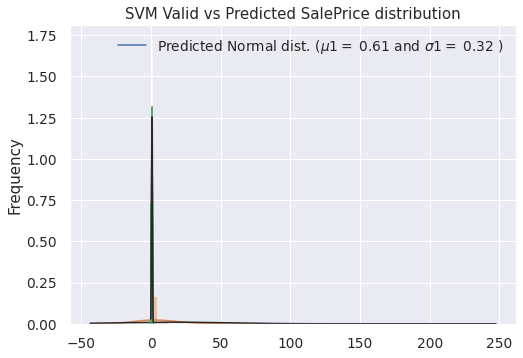

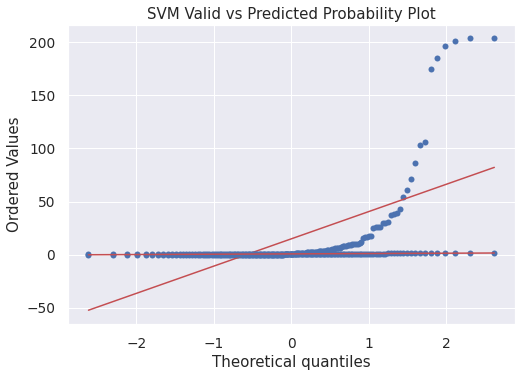

In [ ]:
svm_model = svm.SVR()

svm_model.fit(train_x, train_y)
predicted_y = svm_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)
results(test_y, predicted_y,"SVM")

### Random forest model

Mean squared error:  1650.4831263466413
Variance score: -0.04
Linear Regression :rms 40.626138462160554
Linear Regression :score -0.036570208373261526
Linear Regression :mae 18.225495200057065
Linear Regression :mse 1650.4831263466413
Linear Regression :pearson_coef 0.0746280052651011
Linear Regression :p_value  0.3544984924029177
Linear Regression 
 Predicted mu = 9.06 and sigma = 8.78



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Linear Regression 
 Valid mu = 14.84 and sigma = 39.90

Linear Regression 
 Predicted mu = 9.06 and sigma = 8.78



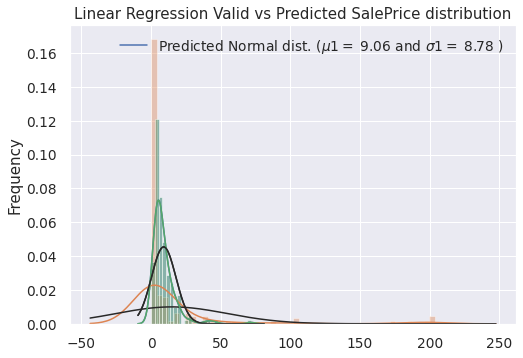

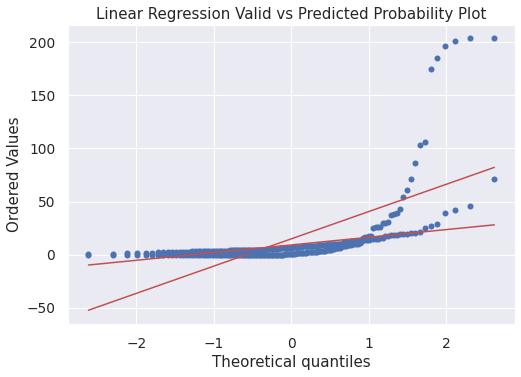

In [ ]:
random_forest = RandomForestRegressor()
random_forest.fit(train_x, train_y)
predicted_y = random_forest.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)
#print_values(test_y, predicted_y)
results(test_y, predicted_y,"Linear Regression")

### Function for generating the graph

In [ ]:
def generate_plot(title, ticks, dataset, color_number):
    colors = ["slateblue", "mediumseagreen", "tomato"]
    plt.figure(figsize=(8, 6))
    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.xticks(np.arange(len(ticks)), ticks, fontsize=10, rotation=30)
    plt.title(title, fontsize = 22)
    plt.bar(ticks, dataset, linewidth=1.2, color=colors[color_number])

In [ ]:
mse_values

[1624.333883707475, 1794.3282071665424, 1650.4831263466413]

### Mean squared error graph

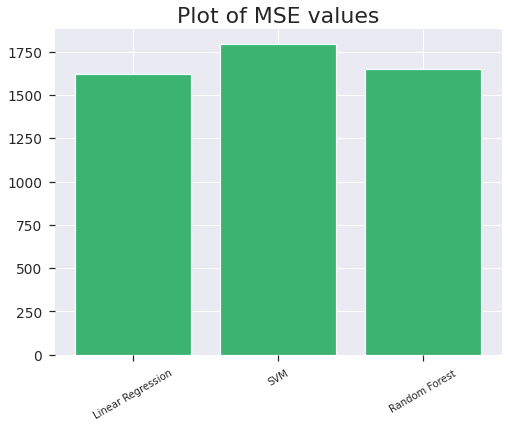

In [ ]:
ticks = ["Linear Regression", "SVM", "Random Forest"]
generate_plot("Plot of MSE values", ticks, mse_values, 1)

### Variance score graph

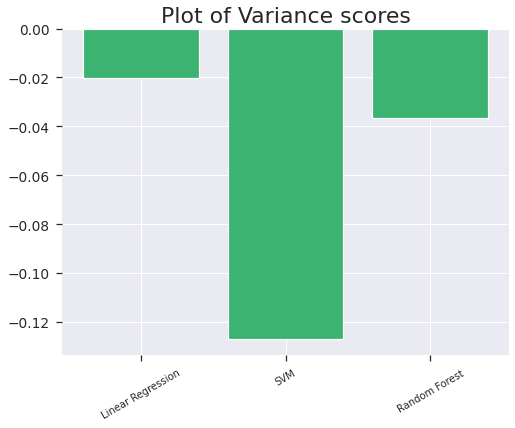

In [ ]:
generate_plot("Plot of Variance scores", ticks, variance_score, 1)

## Applying Log-Transformation to the 'burned area' variable

We can see that the errors in the prediction of burned areas from the given dataset is very high in the above mentioned model. A reason for this could be the high skewness of the 'Burned Area' variable is towards zero.

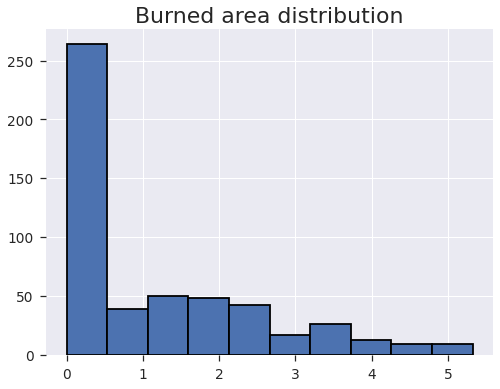

In [ ]:
area_values = list(np.log(np.array(area_values) + 1))
histogram_plot(area_values, title = "Burned area distribution")

### Mean squared error graph

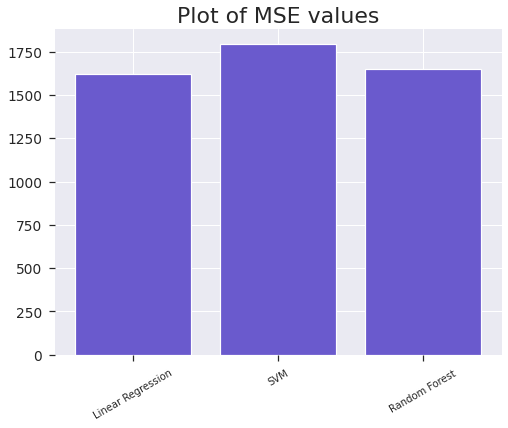

In [ ]:
ticks = ["Linear Regression", "SVM", "Random Forest"]
generate_plot("Plot of MSE values", ticks, mse_values, 0)

### Variance score graph

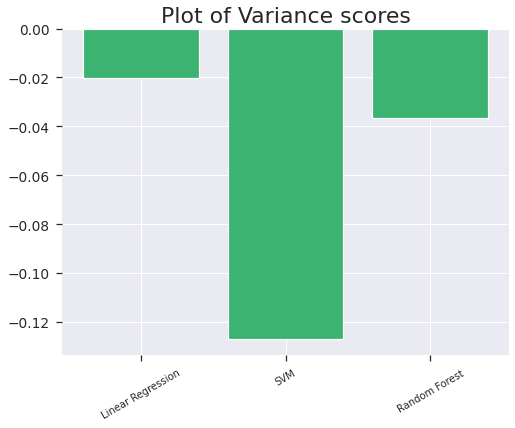

In [ ]:
generate_plot("Plot of Variance scores", ticks, variance_score, 1)

# Assesment 2

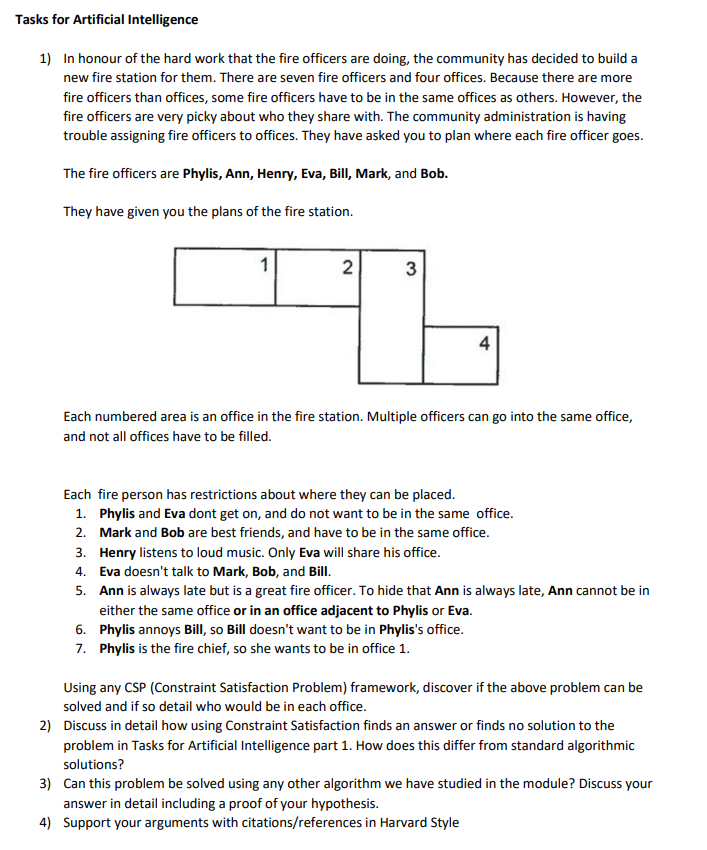

###Answer:
## How using Constraint Satisfaction finds an answer in Problem
A constraint satisfaction problem (CSP) is a set of constraints that must be satisfied. a collection of variables, each variable has its own domain, and a set of restrictions. The goal is to pick a value for each variable so that the resulting alternative world fulfils the constraints; we're looking for a constraint model.A finite CSP has a finite number of variables and each variable has a finite domain. Although several of the approaches discussed in this chapter are designed for infinite, even continuous domains, many of them only operate for finite CSPs.These issues' multidimensional nature, in which each variable can be considered a different dimension, makes them difficult to solve but also gives structure that can be utilised.
## Problem Solving by CSP

CSPs are frequently solved via backtracking search, a type of depth-first search. Inference and search can be combined.
Compatibility: All CSPs are commutative. A issue is commutative if the sequence in which a series of activities is carried out has no bearing on the outcome.
Backtracking search: A depth-first search that selects values for one variable at a time and then backtracks when there are no more legal values to assign to that variable.
The backtracking algorithm selects an unassigned variable each time and then attempts all of the values in that variable's domain in order to discover a solution. If an inconsistency is found, BACKTRACK fails, leading the previous call to try a different value.

#Citation
Brailsford, Sally C. et al (1999).A constraint satisfaction problem necessitates assigning a value to each variable in the problem from a limited domain, ensuring that the constraints related the variables are met. Many combinatorial problems in operational research can be stated as constraint satisfaction problems, such as scheduling and timetabling. When handling such difficulties, artificial intelligence researchers typically choose a consistent satisfaction strategy as their preferred solution.

Gao, J., Wang, J., Wu, K. et al (2020).When exploiting a branch, assigning a variable by a chosen value is a key step in a retrace method, and thus a solid value selection mechanism can substantially speed up the process. To eliminate wasteful searching, we present two value selection rules for existentially and globally quantified variables, respectively, in this study. Prior to trying failed values in previous branches, the rule for universally quantified variables selects the promising values first, while the rule for existentially quantified variables selects the promising values first. Two rules have been added into the state-of-the-art QCSP solver, QCSP-Solve, an exact backtracking solver.

Louise Leenen, Lucas Venter, and Katarina Britz. 2003.Finding values for all variables from a finite domain that fulfil all of the variables' constraints is known as a constraint satisfaction problem (CSP). A constraint satisfaction optimisation problem (CSOP) is a CSP in which the objective function is defined using some or all of the variables. We describe a method that leverages local consistency techniques in a pre-processing step to reduce the domain sizes of the variables.

#References

Brailsford, Sally C. et al (1999). “Constraint satisfaction problems: Algorithms and applications.” Eur. J. Oper. Res. 119: 557-581.

Gao, J., Wang, J., Wu, K. et al (2020). Solving quantified constraint satisfaction problems with value selection rules. Front. Comput. Sci. 14, 145317 . https://doi.org/10.1007/s11704-019-9179-9

Louise Leenen, Lucas Venter, and Katarina Britz. 2003. A pre-processing algorithm for solving constraint satisfaction optimisation problems. In Proceedings of the 2003 annual research conference of the South African institute of computer scientists and information technologists on Enablement through technology (SAICSIT '03). South African Institute for Computer Scientists and Information Technologists, ZAF, 11–15.

##Code

In [ ]:
from typing import Generic, TypeVar, Dict, List, Optional
from abc import ABC, abstractmethod

V = TypeVar('V') # variable type
D = TypeVar('D') # domain type


# Base class for all constraints
class Constraint(Generic[V, D], ABC):
    # The variables that the constraint is between
    def __init__(self, variables: List[V]) -> None:
        self.variables = variables

    # Must be overridden by subclasses
    @abstractmethod
    def satisfied(self, assignment: Dict[V, D]) -> bool:
        ...


# A constraint satisfaction problem consists of variables of type V
# that have ranges of values known as domains of type D and constraints
# that determine whether a particular variable's domain selection is valid
class CSP(Generic[V, D]):
    def __init__(self, variables: List[V], domains: Dict[V, List[D]]) -> None:
        self.variables: List[V] = variables # variables to be constrained
        self.domains: Dict[V, List[D]] = domains # domain of each variable
        self.constraints: Dict[V, List[Constraint[V, D]]] = {}
        for variable in self.variables:
            self.constraints[variable] = []
            if variable not in self.domains:
                raise LookupError("Every variable should have a domain assigned to it.")

    def add_constraint(self, constraint: Constraint[V, D]) -> None:
        for variable in constraint.variables:
            if variable not in self.variables:
                raise LookupError("Variable in constraint not in CSP")
            else:
                self.constraints[variable].append(constraint)

    # Check if the value assignment is consistent by checking all constraints
    # for the given variable against it
    def consistent(self, variable: V, assignment: Dict[V, D]) -> bool:
        for constraint in self.constraints[variable]:
            if not constraint.satisfied(assignment):
                return False
        return True

    def backtracking_search(self, assignment: Dict[V, D] = {}) -> Optional[Dict[V, D]]:
        # assignment is complete if every variable is assigned (our base case)
        if len(assignment) == len(self.variables):
            return assignment

        # get all variables in the CSP but not in the assignment
        unassigned: List[V] = [v for v in self.variables if v not in assignment]

        # get the every possible domain value of the first unassigned variable
        first: V = unassigned[0]
        for value in self.domains[first]:
            local_assignment = assignment.copy()
            local_assignment[first] = value
            # if we're still consistent, we recurse (continue)
            if self.consistent(first, local_assignment):
                result: Optional[Dict[V, D]] = self.backtracking_search(local_assignment)
                # if we didn't find the result, we will end up backtracking
                if result is not None:
                    return result
        return None

In [ ]:

from typing import Dict, List, Optional


class MapColoringConstraint(Constraint[str, str]):
    def __init__(self, place1: str, place2: str) -> None:
        super().__init__([place1, place2])
        self.place1: str = place1
        self.place2: str = place2

    def satisfied(self, assignment: Dict[str, str]) -> bool:
        # If either place is not in the assignment then it is not
        # yet possible for their colors to be conflicting
        if self.place1 not in assignment or self.place2 not in assignment:
            return True
        # check the color assigned to place1 is not the same as the
        # color assigned to place2
        return assignment[self.place1] != assignment[self.place2]


if __name__ == "__main__":
    variables: List[str] = ["Plyis", "Eva", "Mark", "Bob", "Henry", "Bill", "Ann"]
    domains: Dict[str, List[str]] = {}
    for variable in variables:
        domains[variable] = ["1", "2", "3","4"]
    csp: CSP[str, str] = CSP(variables, domains)
    csp.add_constraint(MapColoringConstraint("Plyis", "Eva"))
    csp.add_constraint(MapColoringConstraint("Mark", "Bob"))
    csp.add_constraint(MapColoringConstraint("Henry", "Eva"))
    csp.add_constraint(MapColoringConstraint("Ann", "Plyis"))
    csp.add_constraint(MapColoringConstraint("Ann", "Eva"))
    csp.add_constraint(MapColoringConstraint("Plyis", "Bill"))
    solution: Optional[Dict[str, str]] = csp.backtracking_search()
    if solution is None:
        print("No solution found!")
    else:
        print(solution)

{'Plyis': '1', 'Eva': '2', 'Mark': '1', 'Bob': '2', 'Henry': '1', 'Bill': '2', 'Ann': '3'}
